 # Support Vector Classifier Implementation #
 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Lets create synthetic data point
from sklearn.datasets import make_classification

In [4]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

In [5]:
X

array([[ 0.55942643,  2.38869353],
       [ 1.31217492, -0.7173148 ],
       [-1.5598485 , -1.92487377],
       [-2.2813861 , -0.1368559 ],
       [ 1.56070438, -0.42795824],
       [-0.80804463,  1.19664076],
       [-0.27062383, -2.25553963],
       [ 0.480502  ,  0.54914434],
       [-1.20757158, -1.26898369],
       [ 0.25415746, -1.79532002],
       [ 2.59123946,  0.24472415],
       [ 0.07123641,  0.49429823],
       [-1.17762637, -1.20592943],
       [ 0.93343952,  0.68811892],
       [ 1.65214494, -0.35885569],
       [-1.40735658, -1.56826626],
       [ 1.02255619, -1.08324727],
       [-0.81680628, -0.6795874 ],
       [ 1.50575249, -0.38919817],
       [-2.17105282, -0.04862909],
       [ 0.71479373, -1.42922002],
       [-0.15013844, -0.11708689],
       [-1.4117586 , -1.5332749 ],
       [-2.58590856, -0.40925706],
       [ 0.82600732, -1.05383855],
       [-0.07133524,  0.08896214],
       [ 0.6273745 , -1.32933233],
       [ 1.65882246, -0.43131517],
       [ 1.2798899 ,

In [6]:
y

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

<Axes: xlabel='Feature1', ylabel='Feature2'>

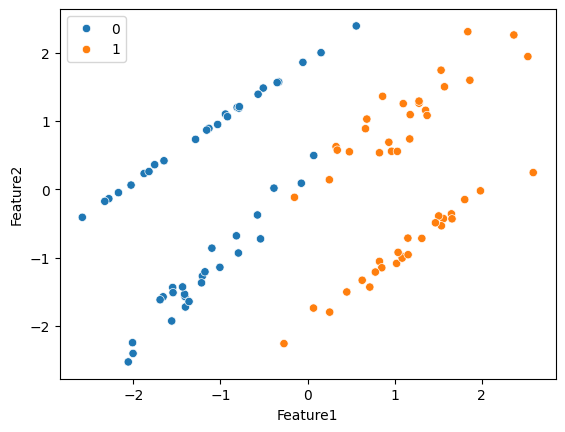

In [9]:
import pandas as pd
import seaborn as sns

# Convert X into DataFrame with 2 columns
df = pd.DataFrame(X, columns=["Feature1", "Feature2"])

# Plot using keyword arguments
sns.scatterplot(x="Feature1", y="Feature2", hue=y, data=df)


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.svm import SVC

In [18]:
svc= SVC(kernel='linear')

In [19]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [20]:
## Predicition
y_pred = svc.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  1]
 [ 0  9]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20



In [23]:
rbf= SVC(kernel='rbf')

In [24]:
rbf.fit(X_train, y_train)

SVC()

In [37]:
svc.coef_

array([[ 2.27735334, -0.60990069]])

In [28]:
## Predicting 
y_pred1 = rbf.predict(X_test)

In [29]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20

[[10  1]
 [ 0  9]]


In [30]:
ploynomial= SVC(kernel='poly')
ploynomial.fit(X_train, y_train)
## Predicting
y_pred2 = ploynomial.predict(X_test)
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.82      1.00      0.90         9

    accuracy                           0.90        20
   macro avg       0.91      0.91      0.90        20
weighted avg       0.92      0.90      0.90        20

[[9 2]
 [0 9]]


In [36]:
sigmoid= SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)

SVC(kernel='sigmoid')

## Hyperparmetere Tuning With SVC

In [31]:
from sklearn.model_selection import GridSearchCV

# Defining parameter range
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

In [33]:
grid=GridSearchCV(SVC(), param_grid=param_grid, refit=True, verbose=2, cv=3)

In [34]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, 

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=2)